# Random Forest Model

### * Model forest_500 * ---> (RMSE=561.1321)

#### Load the data

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [61]:
cleantrain_df = pd.read_csv("../inputs/cleantrain.csv", index_col = 0)
cleanpredict_df = pd.read_csv("../inputs/cleanpredict.csv", index_col = 0)

In [62]:
X = cleantrain_df.drop(columns=["price"])
y = cleantrain_df["price"]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32364, 9) (8091, 9) (32364,) (8091,)


#### Apply the model

In [64]:
model = RandomForestRegressor(n_estimators=500)
fitted_model = model.fit(X, y)

In [65]:
y_pred = fitted_model.predict(cleanpredict_df)
y_pred

array([16409.532, 17742.336,  1538.782, ...,  4171.404,   886.272,
        1422.996])

In [66]:
upload_df = pd.DataFrame({
    'price' : y_pred
})
upload_df.index.rename("id",inplace = True)
upload_df.head()

,price
id,
0,16409.532
1,17742.336
2,1538.782
3,585.772
4,3956.050


In [67]:
upload_df.to_csv("./Output/predictions_randomforest_regression_prueba1.csv", header=True)

#### Uploaded

## Graph

In [68]:
y_test.shape

(8091,)

In [69]:
y_pred = fitted_model.predict(X_test)
y_pred.shape

(8091,)

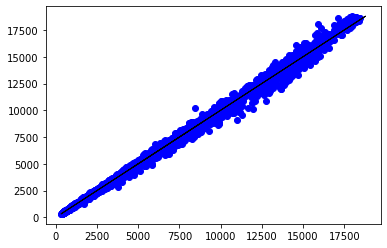

In [73]:
plt.scatter(y_pred, y_test,  color='blue')
plt.plot(y_test, y_test, color='black', linewidth=1)
plt.show()